# Part I: Segmentation

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
food_trucks = pd.read_csv("food_trucks.csv")
food_trucks.head()

,vendorID,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,1,12.40,3.0,163,6.83,2,0.12,30.0
1,2,12.10,1.8,140,3.62,5,269.24,40.5
2,3,13.52,6.0,139,3.86,5,8.17,35.7
3,4,15.56,4.0,124,4.05,3,99.09,32.8
4,5,15.08,8.5,186,6.51,5,33.42,35.6


In [40]:
# A 
food_trucks=food_trucks.drop("vendorID", axis=1)

*(a) Because this variable is a kind of sequential numbering, it is not meaningful for calculating the Euclidean distance*

In [41]:
# B
food_trucks.describe()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,14.334274,3.622581,148.822581,5.008468,3.044355,52.435484,40.824194
std,1.412888,3.779335,18.942080,1.683380,1.719750,52.002194,5.775277
min,8.810000,0.000000,88.000000,-0.270000,0.000000,0.120000,25.400000
25%,13.360000,1.175000,136.750000,3.780000,2.000000,16.305000,37.200000
50%,14.395000,2.600000,149.000000,5.090000,3.000000,38.315000,40.700000
75%,15.242500,4.500000,162.000000,6.105000,4.000000,68.637500,44.200000
max,18.320000,27.300000,202.000000,10.130000,9.000000,271.730000,58.600000


*(a) Since it provides basic statistical information for each numerical column in the dataset, such as count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value. For categorical columns, it provides count, number of unique values, the most frequent value, and the frequency of the most frequent value. -- In addition, the describe() function is a good way to check for errors in the dataset, such as negative or unrealistic values, or unexpected distributions. This can help analysts to ensure the dataset is suitable for the intended analysis, and to avoid biases or inaccuracies in the resulting models.Therefore, it is a valuable tool for any analyst who will use a dataset to build a model.*

In [42]:
# C
food_trucks.isnull().sum()

avg_transaction_cost    0
mnths_operational       0
days_yr                 0
avg_cost_item           0
number_trucks           0
dist_lobland            0
bev_percent             0
dtype: int64

*(a) There is no missing value in this dataset*

*(b) Yes.The minimum value of "avg_cost_item" is -0.27. This variable is the average customer spend per item sold at this particular food truck and should not be a negative value. However, it may result from credit card chargebacks, or from refunds related to purchases from a previous period. -- I chose to replace this impossible value with the mean value of "avg_cost_item".*

In [43]:
food_trucksod=food_trucks.loc[food_trucks['avg_cost_item'] < 0, 'avg_cost_item'] =5.008468
food_trucks.describe()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,14.334274,3.622581,148.822581,5.029752,3.044355,52.435484,40.824194
std,1.412888,3.779335,18.942080,1.649397,1.719750,52.002194,5.775277
min,8.810000,0.000000,88.000000,0.670000,0.000000,0.120000,25.400000
25%,13.360000,1.175000,136.750000,3.787500,2.000000,16.305000,37.200000
50%,14.395000,2.600000,149.000000,5.090000,3.000000,38.315000,40.700000
75%,15.242500,4.500000,162.000000,6.105000,4.000000,68.637500,44.200000
max,18.320000,27.300000,202.000000,10.130000,9.000000,271.730000,58.600000


*D*

*(a) Yes, because these variables are measured in different units.  In such instances, we should definitely scale the data in order to enable a meaningful comparison between them.*

In [44]:
#(b)
z_scores = stats.zscore(food_trucks)
z_scores

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,-1.371790,-0.165066,0.749975,1.093666,-0.608499,-1.008059,-1.878019
1,-1.584551,-0.483224,-0.466708,-0.856436,1.139468,4.177573,-0.056248
2,-0.577485,0.630330,-0.519607,-0.710634,1.139468,-0.852945,-0.889058
3,0.869287,0.100066,-1.313096,-0.595207,-0.025844,0.898979,-1.392214
4,0.528870,1.293159,1.966658,0.899263,1.139468,-0.366406,-0.906408
...,...,...,...,...,...,...,...
243,0.259373,-0.297632,0.220982,3.098443,-0.025844,1.439855,-0.108299
244,0.294833,-0.668817,1.120270,1.731549,0.556812,-0.311105,0.134604
245,1.103323,-0.774869,0.697076,-1.099439,0.556812,-0.155798,-0.524704
246,1.301900,-0.642303,0.220982,-0.248928,0.556812,0.761977,0.047853


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


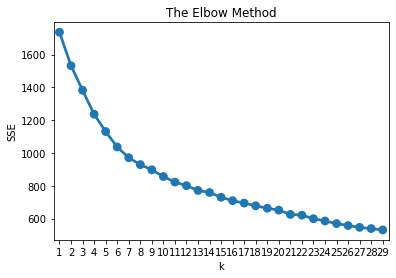

In [45]:
# E (a)
sse = {}
for k in range(1, 30):    
    kmeans = KMeans(n_clusters=k, random_state=654)
    kmeans.fit(z_scores)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

*F* 

*Since we do not have a very clear elbow, let’s just start with k=5 and see what we would obtain.*

In [46]:
# G
kmeans = KMeans(n_clusters=5, random_state=654)
kmeans.fit(z_scores)
labels_5 = kmeans.labels_

In [47]:
score = silhouette_score(z_scores, labels_5)
print("Silhouette Coefficient: ", score)

Silhouette Coefficient:  0.13223798410022314


In [48]:
kmeans = KMeans(n_clusters=6, random_state=654)
kmeans.fit(z_scores)
labels_6 = kmeans.labels_

In [49]:
score = silhouette_score(z_scores, labels_6)
print("Silhouette Coefficient: ", score)

Silhouette Coefficient:  0.14159589722245033


In [50]:
kmeans = KMeans(n_clusters=7, random_state=654)
kmeans.fit(z_scores)
labels_7 = kmeans.labels_

In [51]:
score = silhouette_score(z_scores, labels_7)
print("Silhouette Coefficient: ", score)

Silhouette Coefficient:  0.14318750633683783


*A larger value of Silhouette Coefficient means a better clustering effect. I calculate the Silhouette Coefficientk by j for k=5, 6, 7 can see that the clustering effect is better for k=6. So I chose k=6 for my model.*

In [52]:
# H
kmeans6 = z_scores.assign(Cluster = labels_6)
kmeans6.groupby(['Cluster']).agg({
'avg_transaction_cost': ["count", "mean", "std"],
'mnths_operational': ["count", "mean", "std"],
'days_yr':["count", "mean", "std"],
'avg_cost_item': ["count", "mean", "std"],
'number_trucks': ["count", "mean", "std"],
'dist_lobland':["count", "mean", "std"],
'bev_percent': ["count", "mean", "std"],
}).round(2)

avg_transaction_cost             mnths_operational              \
                       count  mean   std             count  mean   std   
Cluster                                                                  
0                         51  0.46  0.92                51 -0.18  0.64   
1                         25  0.04  0.88                25  2.31  1.07   
2                         21 -0.19  1.16                21 -0.25  0.62   
3                         49 -0.69  0.97                49 -0.18  0.62   
4                         47 -0.29  0.81                47 -0.35  0.52   
5                         55  0.49  0.77                55 -0.33  0.46   

        days_yr             avg_cost_item  ...       number_trucks        \
          count  mean   std         count  ...   std         count  mean   
Cluster                                    ...                             
0            51 -0.40  0.81            51  ...  0.58            51  1.01   
1            25  0.87  0.94            25  ...  0.92            25  0.02   
2            21 -0.17  0.95            21  ...  1.11            21 -0.19   
3            49 -0.94  0.83            49  ...  0.93            49 -0.63   
4            47  0.50  0.65            47  ...  0.71            47  0.26   
5            55  0.44  0.75            55  ...  0.94            55 -0.53   

              dist_lobland             bev_percent              
          std        count  mean   std       count  mean   std  
Cluster                                                         
0        0.83           51 -0.20  0.55          51 -0.40  0.89  
1        0.81           25 -0.34  0.52          25 -0.24  1.25  
2        0.91           21  2.63  0.84          21  0.16  0.69  
3        0.66           49 -0.14  0.60          49 -0.03  0.75  
4        0.87           47 -0.30  0.58          47 -0.60  0.65  
5        0.79           55 -0.28  0.59          55  0.96  0.81  

[6 rows x 21 columns]

In [53]:
# I
kmeans6['Cluster'] = kmeans6['Cluster'].astype('category')

Text(0.5, 1.0, "The distance from the vendor's home address to the main gate of Lobsterland")

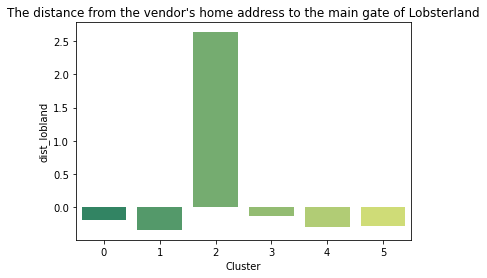

In [54]:
sns.barplot(x='Cluster', y='dist_lobland',palette='summer', data=kmeans6, ci=None);
plt.xlabel('Cluster')
plt.title("The distance from the vendor's home address to the main gate of Lobsterland")

*From this plot, we can see that cluster 5 has the farthest distance from the vendor's home address to the main gate of Lobsterland, and cluster 1 has the closest distance.*

Text(0.5, 1.0, 'The average customer expenditure per transaction')

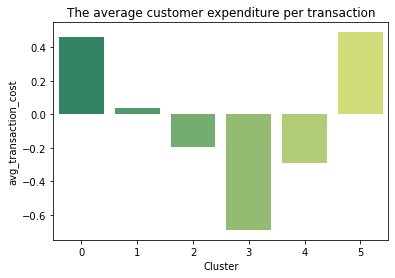

In [55]:
sns.barplot(x='Cluster', y='avg_transaction_cost',palette='summer', data=kmeans6, ci=None)
plt.title("The average customer expenditure per transaction")

*From this plot, we can see that cluster0 and 5 have higher average customer expenditure per transaction, and cluster 3 has the lowest average customer expenditure per transaction.*

Text(0.5, 1.0, 'The average customer expenditure per item ')

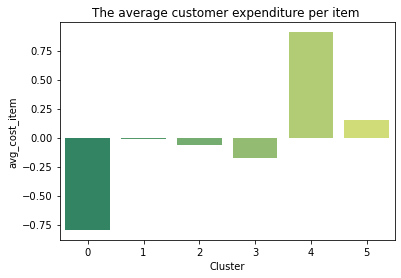

In [58]:
sns.barplot(x='Cluster', y='avg_cost_item',palette='summer', data=kmeans6, ci=None)
plt.title("The average customer expenditure per item ")

*From this plot, we can see that cluster 4 has the highest average customer expenditure per item, and cluster 0 has the lowest average customer expenditure per item.*

Text(0.5, 1.0, 'How long the food truck has been operational(months)')

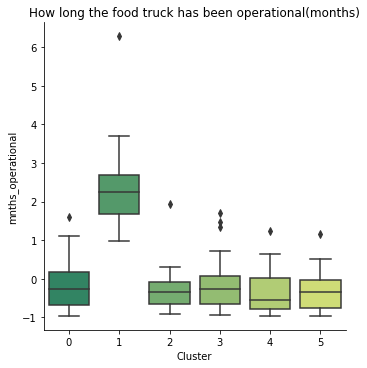

In [57]:
sns.catplot(x="Cluster", y="mnths_operational", palette='summer',kind="box", data=kmeans6);
plt.xlabel('Cluster')
plt.title("How long the food truck has been operational(months)")

*The box plot shows that cluster 0 is clearly operating longer than the other clusters*

Text(0.5, 1.0, 'The total number of food trucks currently operated & managed by the vendor')

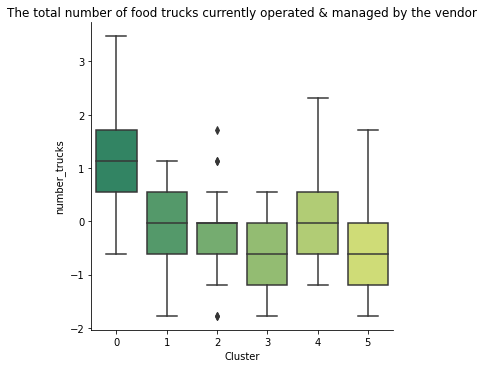

In [207]:
sns.catplot(x="Cluster", y="number_trucks", palette='summer',kind="box", data=kmeans6);
plt.xlabel('Cluster')
plt.title("The total number of food trucks currently operated & managed by the vendor")

*The box plot shows that the vendor of cluster 0 owned more food trucks than the other clusters*

Text(0.5, 1.0, 'The the percentage of sales that are attributable to beverages')

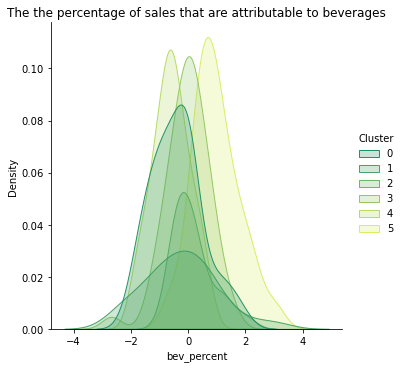

In [208]:
sns.displot(kmeans6, x="bev_percent",palette='summer', hue="Cluster", kind='kde', fill=True)
plt.title("The the percentage of sales that are attributable to beverages")

*This plot shows that the percentage of beverage sold in cluster 5 is greater than the average of all cluster, while cluster 3 is smaller than the average of all clusters*

*J*

*cluster 0: "Expensive_food-oriented_Large-scale"  Since it has the highest average customer expenditure per transaction and the hightest average number of food trucks*


*cluster 1："Long-established_Small profit, big sales" Since it has the longest operating time，besides its goods are priced low -- Vendors with brand history*

*cluster 2: "Far Away" Since it has the longest distance from the vendor's home address to the main gate of Lobsterland -- Vendors who do not focus only on the lobsterland*

*cluster 3：“Small-scale rookies” Since it operates for a short period of time and has a small number of food trucks -- Small-scale vendors*


*cluster 4："Luxury_food-oriented-rookies" Since it operates for a short period of time and mainly sells higher-priced food items -- Newborn high-quality food vendors*


*cluster 5: “Beverage-oriented_Large sales volume” -- Since it mainly sells beverage and has higher average customer expenditure per transaction --Inexpensive beverage vendors*

*K*

*From the clustering results we can find that there are food-oriented food trucks and beverage-oriented food trucks, and the lobsterland operators should consider providing a relatively balanced supply of food and beverages. -- We should encourage low-priced food trucks(lower average customer expenditure per item) to enter the lobsterland because visitors are usually willing to pay high prices to eat at restaurants rather than buy fast food from the trucks.-- Vendors who have been in operation for a long time should be approved because it means they have more experience in operating food trucks -- We should be cautious with the cluster whose vendor's home address is far from the lobsterland, as the long distance may cause them to arrive late and leave prematurely*

# Part II: Conjoint Analysis with a Linear Model 

In [11]:
# A
woodie= pd.read_csv("woodie.csv")
woodie.head()
#print(woodie.columns)

,bundleID,start_high,maxspeed,steepest_angle,seats_car,drop,track_color,avg_rating
0,1,Yes,40,50,2,100,red,7.613468
1,2,Yes,40,50,2,100,blue,5.266737
2,3,Yes,40,50,2,100,green,4.871951
3,4,Yes,40,50,2,100,white,4.453202
4,5,Yes,40,50,2,200,red,5.476815


*B* 

*Numeric: avg_rating;*

*Categorical: bundleID, start_high, maxspeed, steepest_angle, seats_car, drop, track_color*

In [12]:
# C
woodie =woodie.drop("bundleID", axis=1)

In [13]:
woodie = pd.get_dummies(woodie, drop_first=True, columns=["start_high","track_color","drop","maxspeed","steepest_angle","seats_car",])

In [14]:
woodie

,avg_rating,start_high_Yes,track_color_green,track_color_red,track_color_white,drop_200,drop_300,maxspeed_60,maxspeed_80,steepest_angle_75,seats_car_4
0,7.613468,1,0,1,0,0,0,0,0,0,0
1,5.266737,1,0,0,0,0,0,0,0,0,0
2,4.871951,1,1,0,0,0,0,0,0,0,0
3,4.453202,1,0,0,1,0,0,0,0,0,0
4,5.476815,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
283,7.945668,0,0,0,1,1,0,0,1,1,1
284,6.428464,0,0,1,0,0,1,0,1,1,1
285,5.458812,0,0,0,0,0,1,0,1,1,1
286,5.775802,0,1,0,0,0,1,0,1,1,1


*(a) By dummifying these variables, we can represent them as a set of binary variables, one for each category or level. This allows us to capture the categorical or ordinal nature of the variables, and to fit a linear model that accurately reflects the true relationship between the variables and the outcome.*

In [29]:
# D
from sklearn.model_selection import train_test_split
X=woodie[['start_high_Yes', 'track_color_green', 'track_color_red', 'track_color_white', 'drop_200',
       'drop_300','maxspeed_60', 'maxspeed_80', 'steepest_angle_75', 'seats_car_4']]  # Features
y=woodie['avg_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=654)

In [30]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
# E
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_rating   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     24.78
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           3.07e-33
Time:                        00:56:10   Log-Likelihood:                -520.54
No. Observations:                 288   AIC:                             1063.
Df Residuals:                     277   BIC:                             1103.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9272      0.294     13.363      0.000       3.349       4.506
start_high_Yes        1.0567      0.177      5.963      0.000       0.708       1.406
track_color_green    -0.0656      0.251     -0.262      0.794      -0.559       0.428
track_color_red       1.7910      0.251      7.146      0.000       1.298       2.284
track_color_white    -0.2357      0.251     -0.940      0.348      -0.729       0.258
drop_200              1.0416      0.217      4.799      0.000       0.614       1.469
drop_300              1.1993      0.217      5.526      0.000       0.772       1.627
maxspeed_60           1.7358      0.217      7.998      0.000       1.309       2.163
maxspeed_80           1.4942      0.217      6.884      0.000       1.067       1.922
steepest_angle_75    -0.5186      0.177     -2.926      0.004      -0.867      -0.170
seats_car_4          -0.4421      0.177     -2.495      0.013      -0.791      -0.093
==============================================================================
Omnibus:                        1.956   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.948
Skew:                          -0.144   Prob(JB):                        0.377
Kurtosis:                       2.718   Cond. No.                         7.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*F. First, the p-value shows that all features are significant except for green and white in the color features. -- The coefficient of 1.791008 for 'track_color_red' indicates that people are more willing to rate red coasters higher, perhaps because red can make people feel more excited.-- The negative coefficient of 'steepest_angle_75' and 'seats_car_4' indicates that visitors are more like coasters with 50-degree drop and 2 seats. -- In terms of drop,visitors prefer the vertical drop of 300feet. -- A roller
coaster whose riders begin the ride at a high altitude will be more popular. -- 60mph is the best for the speed.*

*In general, tourists like the red two-seater roller coaster, in terms of speed and height and steepness,they always seek for thrills but not too exciting, moderate features are the most suitable*

# Part III: Wildcard: Marketing & Segments

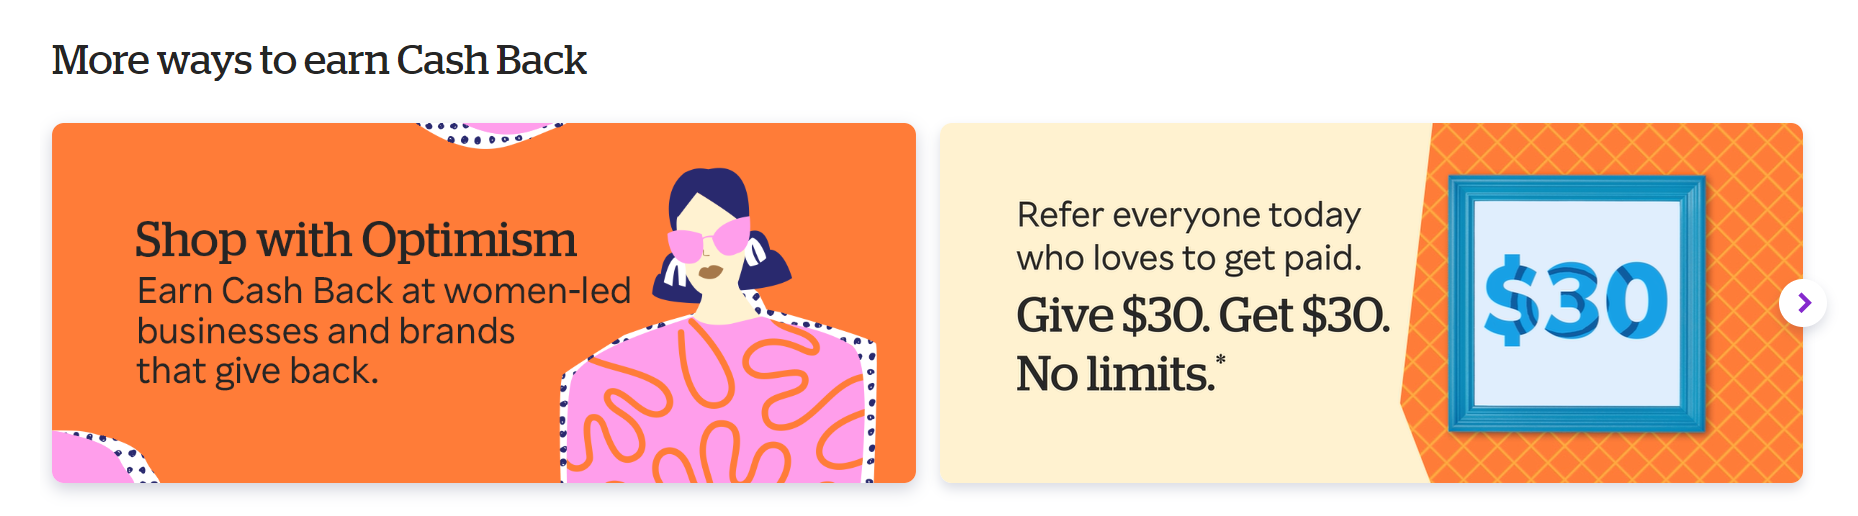

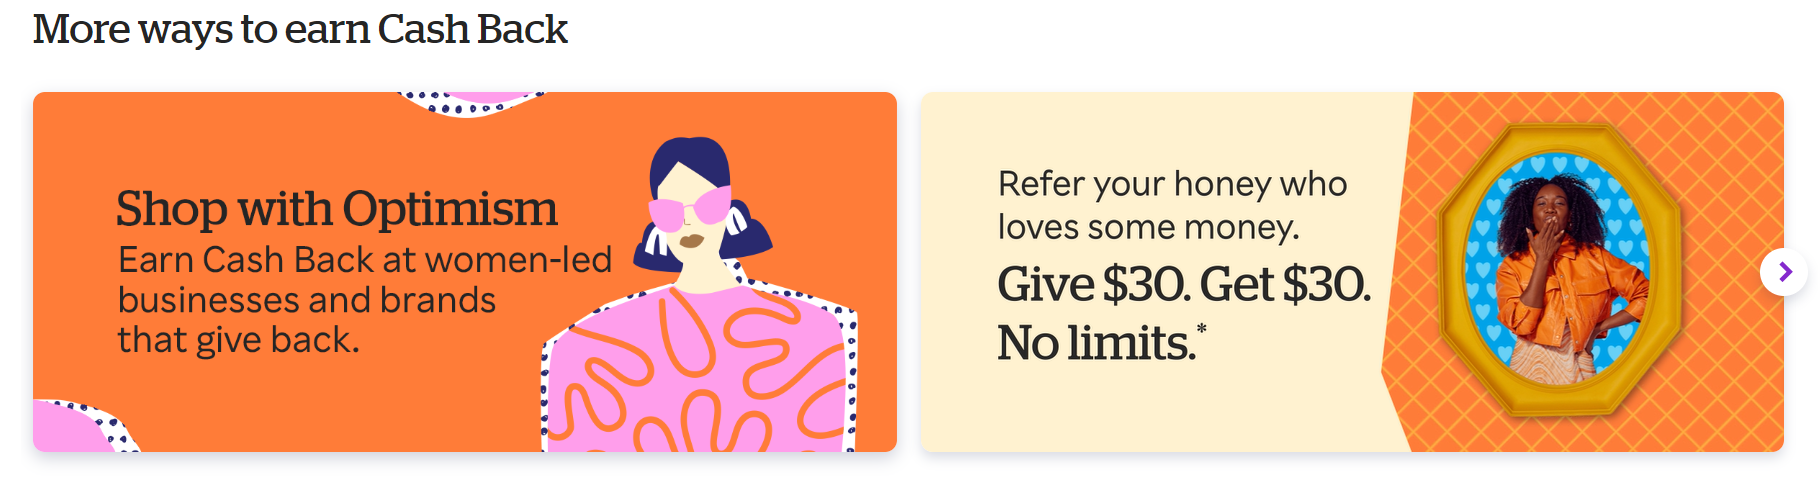

*Rakuten is the shopping site I'm using to get cashback. Consumers can earn 1%-15% cashback on every purchase made on this site.-- I think, firstly, this ad is aimed at consumers who are young and can use the Internet, and a more detailed segment is young women, who like to shop online and are interested in cashback, as you can see there are many female elements in the picture.-- A more detailed segment, in terms of personality and habits, its target consumers should be not worry about trouble, careful, have more free time and love to share. -- I fit this description perfectly.-- I think this ad is effective because for a target group like me, it's tempting to refer a friend and receive a $30 bonus, and I'd love to do that when I saw the ad at first time.*